In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import statsmodels.api as sm

In [102]:
# Load dataset and show all rows
df = pd.read_csv("credit_risk_dataset.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [103]:
# getting shape of dataset
df.shape

(32581, 12)

In [104]:
# checking datatypes
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [105]:
# Describe Data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [106]:
# Checking for Null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [107]:
# Check Null values in relation to all values of a column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(df)

,Missing Values,% of Total Values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,2.747000
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,9.563856
loan_status,0,0.000000
loan_percent_income,0,0.000000


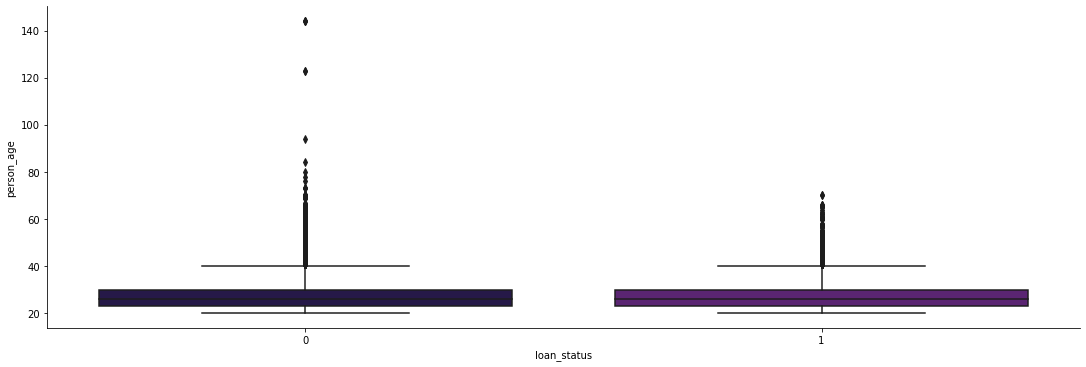

In [108]:
sns.catplot(y="person_age", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

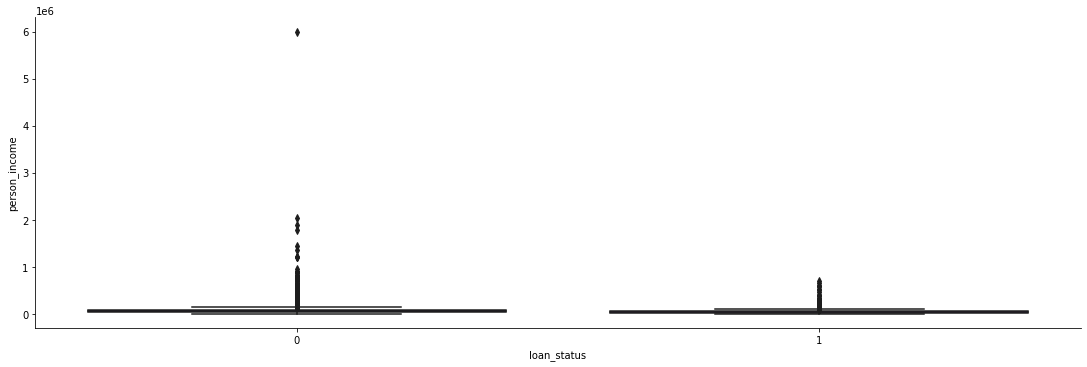

In [109]:
sns.catplot(y="person_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

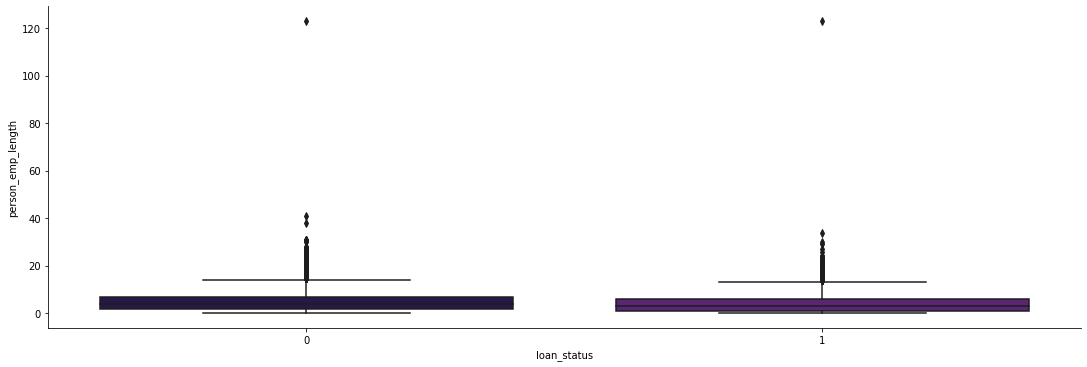

In [110]:
sns.catplot(y="person_emp_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

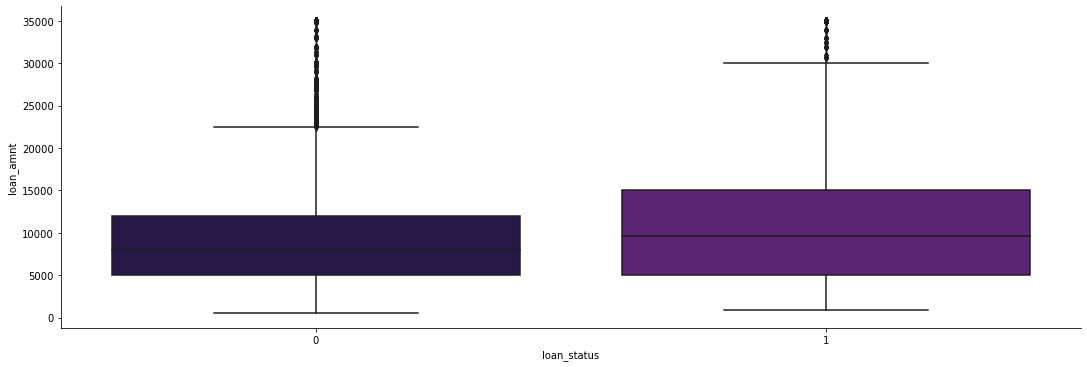

In [111]:
sns.catplot(y="loan_amnt", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

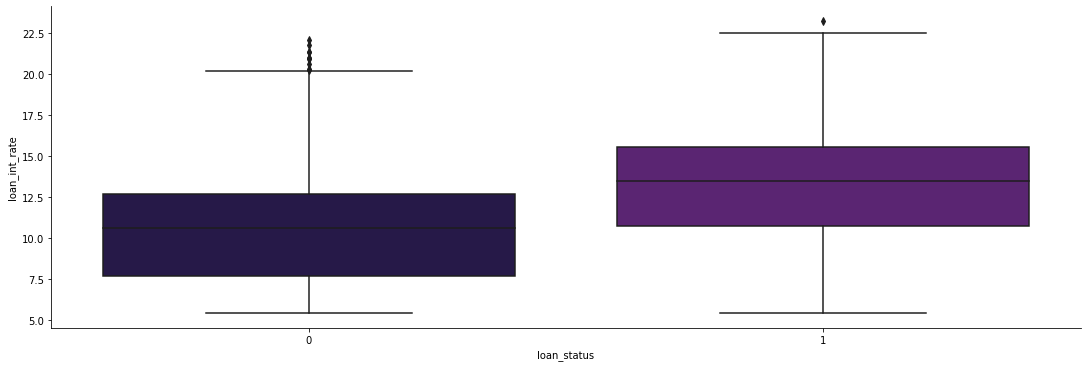

In [112]:
sns.catplot(y="loan_int_rate", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

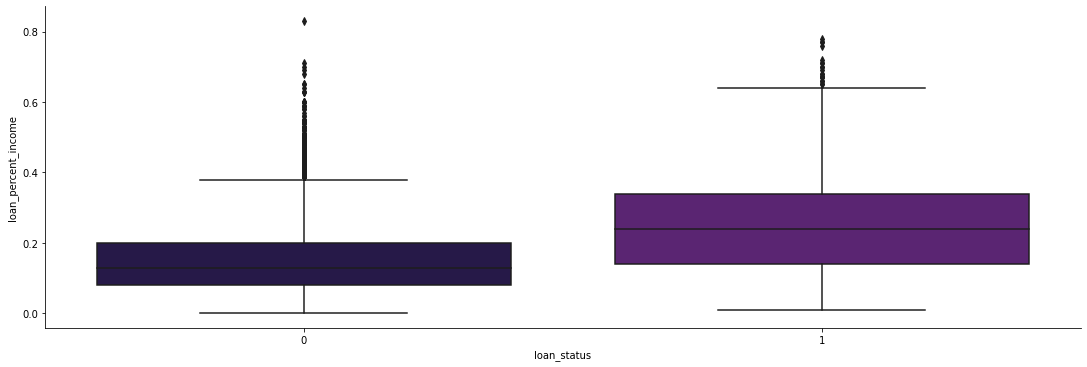

In [113]:
sns.catplot(y="loan_percent_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

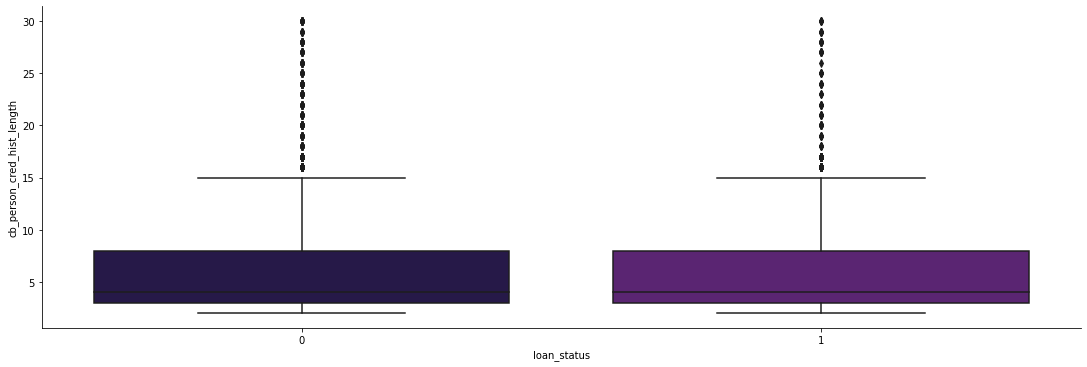

In [114]:
sns.catplot(y="cb_person_cred_hist_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [115]:
df[df['loan_int_rate']>20]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.03,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.16,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.03,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.11,1,0.31,Y,2
1827,24,30000,RENT,5.0,MEDICAL,G,2000,21.27,1,0.07,Y,3
2436,22,23000,RENT,1.0,MEDICAL,F,2800,21.74,1,0.12,N,4
2620,22,37000,RENT,2.0,DEBTCONSOLIDATION,E,3000,20.30,1,0.08,N,2
2897,22,35000,MORTGAGE,NaN,VENTURE,F,5000,21.36,0,0.14,Y,2


In [116]:
df[df['loan_percent_income']>0.7]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
460,24,18000,OWN,6.0,PERSONAL,A,13000,7.88,1,0.72,N,3
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,1,0.77,N,2
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,1,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0,0.83,N,3
2452,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4
10007,21,13000,RENT,0.0,DEBTCONSOLIDATION,C,9250,12.53,1,0.71,N,3
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,1,0.76,N,5
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,1,0.78,N,6
27878,33,10080,OWN,11.0,VENTURE,A,7200,6.03,1,0.71,N,8


In [117]:
# removing outliers for person_age > 100
# removing outliers for person_emp_length > 50
# removing outliers for person_income > 600k

In [118]:
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [119]:
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [120]:
df[df['person_income']>5000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [121]:
# data does not seem plausible, so we can reomove these rows without doing a mistake

In [122]:
df_clean = df[(df['person_age']<=100)&(df['person_emp_length']<=50)&(df['person_income']<=5000000)]
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [123]:
df_clean = df_clean.sort_values(by="loan_grade")
df_clean.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3
22774,28,18000,RENT,9.0,HOMEIMPROVEMENT,A,7600,8.49,1,0.42,N,9
22770,27,85000,RENT,1.0,DEBTCONSOLIDATION,A,7525,NaN,0,0.09,N,8
9590,25,30000,RENT,0.0,HOMEIMPROVEMENT,A,8300,8.90,1,0.28,N,3
22766,31,58000,MORTGAGE,15.0,VENTURE,A,8875,NaN,0,0.15,N,6
9592,21,50000,RENT,5.0,DEBTCONSOLIDATION,A,8300,8.90,0,0.17,N,4


<AxesSubplot:xlabel='person_age', ylabel='person_income'>

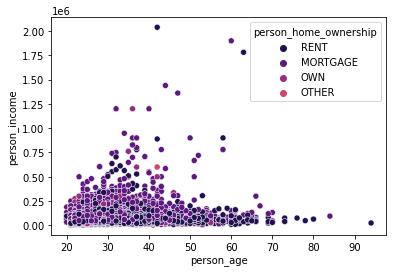

In [124]:
sns.scatterplot(data=df_clean, x="person_age", y="person_income", hue="person_home_ownership")

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_int_rate'>

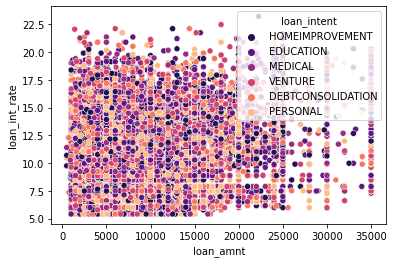

In [125]:
sns.scatterplot(data=df_clean, x="loan_amnt", y="loan_int_rate", hue="loan_intent")


<AxesSubplot:xlabel='loan_amnt', ylabel='person_income'>

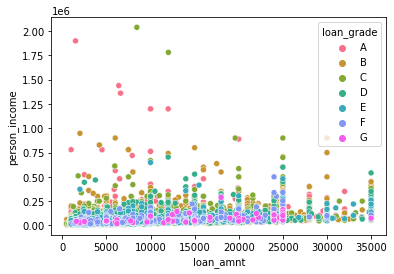

In [126]:
sns.scatterplot(data=df_clean, x="loan_amnt", y="person_income", hue="loan_grade")


<AxesSubplot:xlabel='person_age', ylabel='loan_int_rate'>

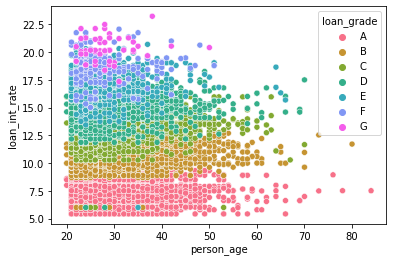

In [127]:
sns.scatterplot(data=df_clean, x="person_age", y="loan_int_rate", hue="loan_grade")

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_int_rate'>

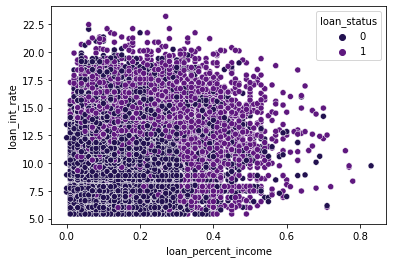

In [128]:
# Variable of interest
sns.scatterplot(data=df_clean, x="loan_percent_income", y="loan_int_rate", hue="loan_status")

In [129]:
# Person_home_ownership
default_hist_status_tab = pd.crosstab(df_clean['person_home_ownership'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
person_home_ownership,,
MORTGAGE,11460,1630
OTHER,74,33
OWN,2243,167
RENT,11077,4995


In [130]:
# number of customers per home ownership
mortgage=default_hist_status_tab.iloc[0].sum()
other=default_hist_status_tab.iloc[1].sum()
own=default_hist_status_tab.iloc[2].sum()
rent=default_hist_status_tab.iloc[3].sum()
# number of customers per home ownership who default
mortgage_default=default_hist_status_tab.iloc[0,1].sum()
other_default=default_hist_status_tab.iloc[1,1].sum()
own_default=default_hist_status_tab.iloc[2,1].sum()
rent_default=default_hist_status_tab.iloc[3,1].sum()
# % number of customers per home ownership who default
mortgage_pers= round(mortgage_default / mortgage * 100, 2)
other_pers= round(other_default / other * 100, 2)
own_pers= round(own_default / own * 100, 2)
rent_pers= round(rent_default / rent * 100, 2)
print("{} % of clients with a mortgage have defaulted.".format(mortgage_pers))
print("{} % of clients with other living situation have defaulted.".format(other_pers))
print("{} % of clients with a own home have defaulted.".format(own_pers))
print("{} % of clients with a rented home have defaulted.".format(rent_pers))

12.45 % of clients with a mortgage have defaulted.
30.84 % of clients with other living situation have defaulted.
6.93 % of clients with a own home have defaulted.
31.08 % of clients with a rented home have defaulted.


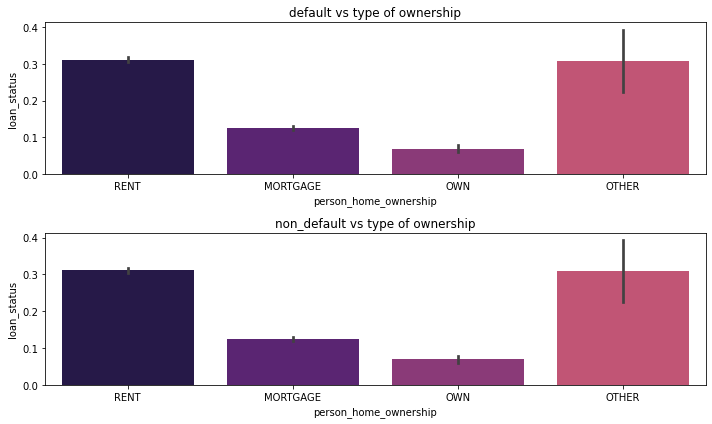

In [131]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="person_home_ownership", y="loan_status", data=df_clean)
axes[0].set_title("default vs type of ownership")

sns.barplot(ax=axes[1], x="person_home_ownership", y="loan_status", data=df_clean)
axes[1].set_title("non_default vs type of ownership")

plt.tight_layout()

In [132]:
# Loan_intent
intent_tab = pd.crosstab(df_clean['loan_intent'], df_clean['loan_status'])
intent_tab

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3627,1437
EDUCATION,5222,1066
HOMEIMPROVEMENT,2613,897
MEDICAL,4332,1565
PERSONAL,4321,1046
VENTURE,4739,814


In [133]:
# number of customers per rason
debt_consolidation=intent_tab.iloc[0].sum()
education=intent_tab.iloc[1].sum()
homeimprovement=intent_tab.iloc[2].sum()
medical=intent_tab.iloc[3].sum()
personal=intent_tab.iloc[4].sum()
venture=intent_tab.iloc[5].sum()
# number of customers per lreason who default
debt_consolidation_default=intent_tab.iloc[0,1].sum()
education_default=intent_tab.iloc[1,1].sum()
homeimprovement_default=intent_tab.iloc[2,1].sum()
medical_default=intent_tab.iloc[3,1].sum()
personal_default=intent_tab.iloc[4,1].sum()
venture_default=intent_tab.iloc[5,1].sum()
# % number of customers per reason who default
debt_consolidation_pers= round(debt_consolidation_default / debt_consolidation * 100, 2)
education_pers= round(education_default / education * 100, 2)
homeimporvement_pers= round(homeimprovement_default / homeimprovement * 100, 2)
medical_pers= round(medical_default / medical * 100, 2)
personal_pers= round(personal_default / personal * 100, 2)
venture_pers= round(venture_default / venture * 100, 2)
print("{} % of clients with a loan for debt_consolidation have defaulted.".format(debt_consolidation_pers))
print("{} % of clients with a loan for education have defaulted.".format(education_pers))
print("{} % of clients with a loan for homeimprovement have defaulted.".format(homeimporvement_pers))
print("{} % of clients with a loan for medical have defaulted.".format(medical_pers))
print("{} % of clients with a loan for personal have defaulted.".format(personal_pers))
print("{} % of clients with a loan for venture have defaulted.".format(venture_pers))

28.38 % of clients with a loan for debt_consolidation have defaulted.
16.95 % of clients with a loan for education have defaulted.
25.56 % of clients with a loan for homeimprovement have defaulted.
26.54 % of clients with a loan for medical have defaulted.
19.49 % of clients with a loan for personal have defaulted.
14.66 % of clients with a loan for venture have defaulted.


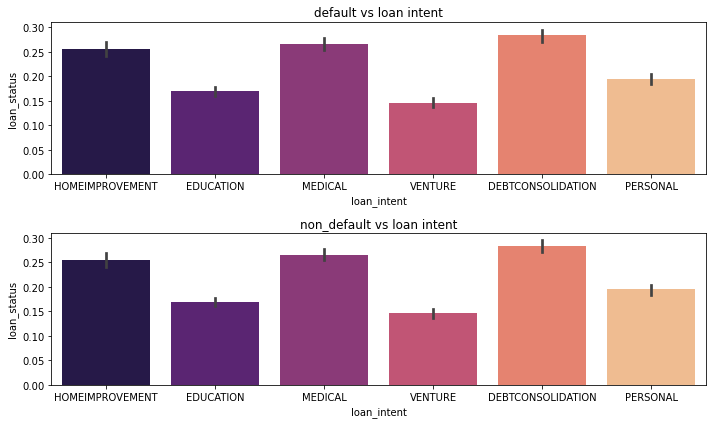

In [134]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="loan_intent", y="loan_status", data=df_clean)
axes[0].set_title("default vs loan intent")

sns.barplot(ax=axes[1], x="loan_intent", y="loan_status", data=df_clean)
axes[1].set_title("non_default vs loan intent")

plt.tight_layout()

In [135]:
# Loan_grade
loan_grade_tab = pd.crosstab(df_clean['loan_grade'], df_clean['loan_status'])
loan_grade_tab

loan_status,0,1
loan_grade,,
A,9379,991
B,8561,1622
C,5036,1283
D,1466,2089
E,341,611
F,70,166
G,1,63


In [136]:
# number of customers per loan grade
a_grade=loan_grade_tab.iloc[0].sum()
b_grade=loan_grade_tab.iloc[1].sum()
c_grade=loan_grade_tab.iloc[2].sum()
d_grade=loan_grade_tab.iloc[3].sum()
e_grade=loan_grade_tab.iloc[4].sum()
f_grade=loan_grade_tab.iloc[5].sum()
g_grade=loan_grade_tab.iloc[6].sum()
# number of customers per loan grade who default
a_grade_default=loan_grade_tab.iloc[0,1].sum()
b_grade_default=loan_grade_tab.iloc[1,1].sum()
c_grade_default=loan_grade_tab.iloc[2,1].sum()
d_grade_default=loan_grade_tab.iloc[3,1].sum()
e_grade_default=loan_grade_tab.iloc[4,1].sum()
f_grade_default=loan_grade_tab.iloc[5,1].sum()
g_grade_default=loan_grade_tab.iloc[6,1].sum()
# % number of customers per loan grade who default
a_pers= round(a_grade_default / a_grade * 100, 2)
b_pers= round(b_grade_default / b_grade * 100, 2)
c_pers= round(c_grade_default / c_grade * 100, 2)
d_pers= round(d_grade_default / d_grade * 100, 2)
e_pers= round(e_grade_default / e_grade * 100, 2)
f_pers= round(f_grade_default / f_grade * 100, 2)
g_pers= round(g_grade_default / g_grade * 100, 2)
print("{} % of clients with grade a have defaulted.".format(a_pers))
print("{} % of clients with grade b have defaulted.".format(b_pers))
print("{} % of clients with grade c have defaulted.".format(c_pers))
print("{} % of clients with grade d have defaulted.".format(d_pers))
print("{} % of clients with grade e have defaulted.".format(e_pers))
print("{} % of clients with grade f have defaulted.".format(f_pers))
print("{} % of clients with grade g have defaulted.".format(g_pers))

9.56 % of clients with grade a have defaulted.
15.93 % of clients with grade b have defaulted.
20.3 % of clients with grade c have defaulted.
58.76 % of clients with grade d have defaulted.
64.18 % of clients with grade e have defaulted.
70.34 % of clients with grade f have defaulted.
98.44 % of clients with grade g have defaulted.


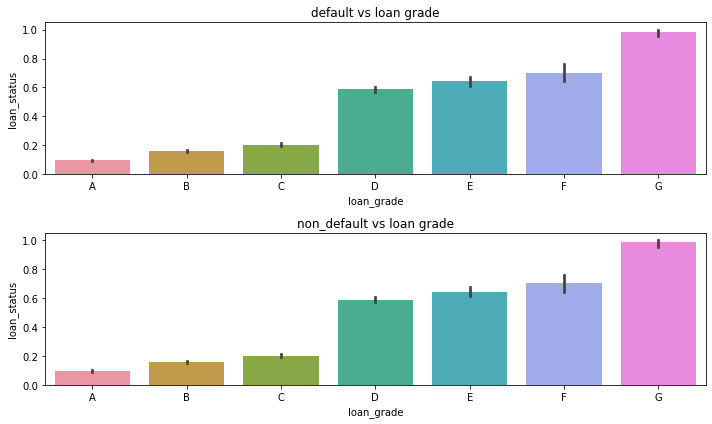

In [137]:
fig, axes=plt.subplots(2,1, figsize=(10,6))
sns.set_palette("magma")
sns.barplot(ax=axes[0],x="loan_grade", y="loan_status", data=df_clean)
axes[0].set_title("default vs loan grade")

sns.barplot(ax=axes[1], x="loan_grade", y="loan_status", data=df_clean)
axes[1].set_title("non_default vs loan grade")

plt.tight_layout()

In [138]:
# cb_person_default_on_file
default_hist_status_tab = pd.crosstab(df_clean['cb_person_default_on_file'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21340,4711
Y,3514,2114


In [139]:
# number of customers whith no bad history
no_history = default_hist_status_tab.iloc[0].sum()
print(no_history,"customers did not have a previous default history")
# customers with "bad credit" history
history = default_hist_status_tab.iloc[1].sum()
print(history,"customers had a previous default history")
# number of customers with no bad history who have defaulted
defaulted_no = default_hist_status_tab.iloc[0,1]
print(defaulted_no,"customers with no previous default history have defaulted")
# number of customers with bad history who have defaulted
defaulted_yes = default_hist_status_tab.iloc[1,1]
print(defaulted_yes,"customers who previously defaulted have defaulted again")
# % of clients with no bad history have defaulted
# % of clients with bad history have defaulted
defaulted_no_perc = round(defaulted_no / no_history * 100, 2)
defaulted_yes_perc = round(defaulted_yes / history * 100, 2)
print("{} % of clients with no previous default history have defaulted.".format(defaulted_no_perc))
print("And {} % of clients who had previously defaulted, defaulted again.".format(defaulted_yes_perc))

26051 customers did not have a previous default history
5628 customers had a previous default history
4711 customers with no previous default history have defaulted
2114 customers who previously defaulted have defaulted again
18.08 % of clients with no previous default history have defaulted.
And 37.56 % of clients who had previously defaulted, defaulted again.


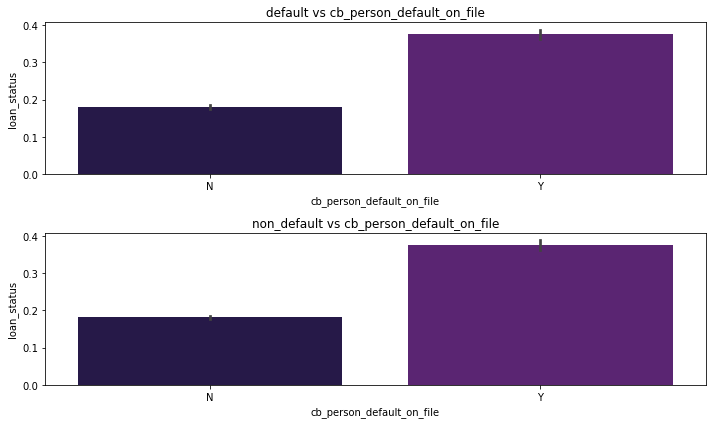

In [140]:
fig, axes=plt.subplots(2,1, figsize=(10,6))
sns.set_palette("magma")
sns.barplot(ax=axes[0],x="cb_person_default_on_file", y="loan_status", data=df_clean)
axes[0].set_title("default vs cb_person_default_on_file")

sns.barplot(ax=axes[1], x="cb_person_default_on_file", y="loan_status", data=df_clean)
axes[1].set_title("non_default vs cb_person_default_on_file")

plt.tight_layout()

In [141]:
# percentage of total defaults
total_default = round((defaulted_no+defaulted_yes) / (no_history+history) *100,2)
print("{}% of total clients population have defaulted.".format(total_default))

21.54% of total clients population have defaulted.


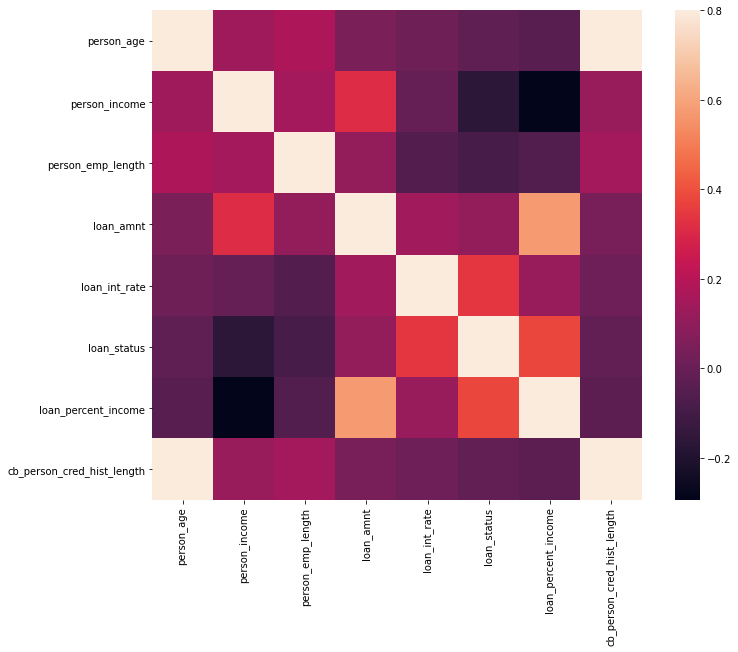

In [142]:
# Correlation matrix
corrmat = df_clean.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [143]:
df_clean.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000


In [144]:
# create dummy variables for nummeric variables
df_dum=pd.concat([pd.get_dummies(df_clean['person_home_ownership'], drop_first=True), pd.get_dummies(df_clean['loan_intent'], drop_first=True), pd.get_dummies(df_clean['loan_grade'], drop_first=True),pd.get_dummies(df_clean['cb_person_default_on_file'], drop_first=True)], axis=1)
df_merged = df_clean.merge(df_dum, left_index = True, right_index = True)
df_merged.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


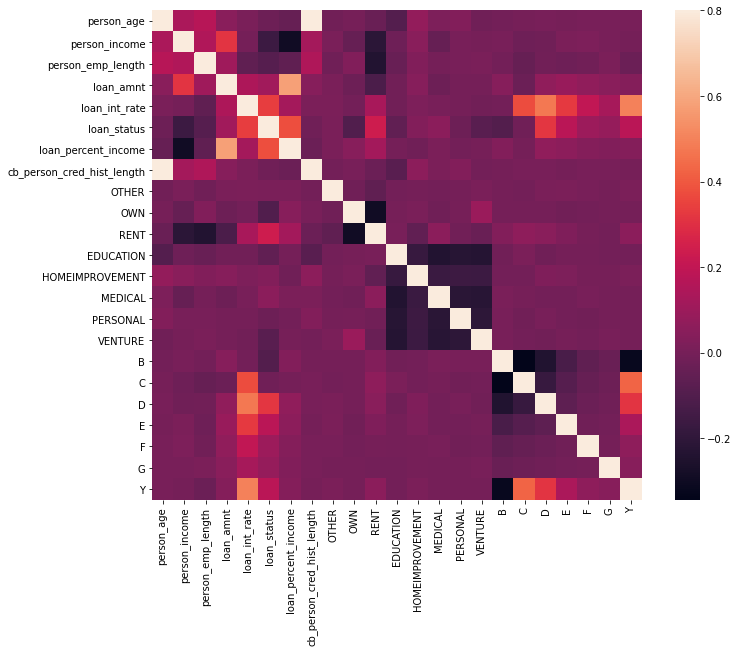

In [145]:
corrmat_2 = df_merged.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat_2, vmax = .8, square = True)
plt.show()

In [146]:
df_merged.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258,-0.008685,0.000998,-0.033102,-0.092365,0.076775,0.020130,0.034989,-0.013154,-0.006238,0.003431,0.008361,0.003017,0.008955,0.005118,0.006616
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272,0.010920,-0.039829,-0.211717,-0.017583,0.052324,-0.039830,0.008666,0.003370,0.005712,-0.018920,-0.016344,0.015589,0.018769,0.008768,-0.003483
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404,-0.015868,0.027421,-0.236502,-0.039182,0.030806,-0.001765,0.009253,0.010169,-0.004636,-0.041209,-0.009772,-0.017666,-0.011333,0.014975,-0.030016
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678,0.013001,-0.022589,-0.118122,-0.010911,0.043983,-0.023304,-0.001162,-0.000500,0.044990,-0.029970,0.068687,0.091098,0.070248,0.053527,0.038768
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330,0.017611,-0.006763,0.132904,-0.008824,0.020436,0.005856,-0.002829,-0.008614,-0.007903,0.372474,0.477214,0.327038,0.200682,0.129622,0.500233
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830,0.013164,-0.102004,0.235343,-0.055574,0.034441,0.058101,-0.022572,-0.077212,-0.094013,-0.015060,0.321853,0.182541,0.102823,0.084150,0.181090
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683,0.012245,0.045870,0.117368,-0.001474,-0.016024,0.014110,-0.004504,0.001613,0.034327,-0.000510,0.069808,0.059210,0.036348,0.031456,0.036227
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000,-0.006913,0.004892,-0.026450,-0.077459,0.058951,0.014605,0.036005,-0.008110,-0.002900,0.007075,0.007668,-0.000290,0.006694,0.007136,0.004003
OTHER,-0.008685,0.010920,-0.015868,0.013001,0.017611,0.013164,0.012245,-0.006913,1.000000,-0.016705,-0.059077,-0.005782,0.000250,-0.004079,-0.000185,0.010366,-0.000459,-0.005914,0.013777,0.015247,0.007611,-0.002619,0.014221
OWN,0.000998,-0.039829,0.027421,-0.022589,-0.006763,-0.102004,0.045870,0.004892,-0.016705,1.000000,-0.291192,0.003175,0.012508,-0.013343,0.001810,0.097564,-0.003742,-0.001705,0.000208,-0.012849,-0.006859,0.000348,-0.001294


In [147]:
# to avoid multicollinearity, replace person age from data frame as well as loan_amount
df_clean_final= df_merged.drop(['person_age', "loan_amnt"], axis=1)
df_clean_final.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
24285,60000,RENT,4.0,HOMEIMPROVEMENT,A,8.49,0,0.07,N,10,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9577,25200,RENT,1.0,EDUCATION,A,7.49,1,0.33,N,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9578,30000,RENT,5.0,MEDICAL,A,7.51,0,0.28,N,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
22777,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,5.42,0,0.07,N,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9582,62500,MORTGAGE,7.0,VENTURE,A,7.43,0,0.06,N,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [148]:
# loan_percent_income type?!

In [149]:
# What affects loan_grade?
# What affects loan amount?
# What affects loan interest rate?

### Logistic Regression

In [150]:
#### Logstic Regression
# We will build two models of logistic regression:
# 1.) Through replacing rows with Null values
# 2.) Filling Null values with Median/Mean

In [151]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean_final, test_size=0.1)

In [152]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [153]:
df_train = pd.read_csv("train.csv")

In [154]:
df_train.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
0,35000,RENT,5.0,MEDICAL,C,13.49,1,0.32,N,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,105000,MORTGAGE,1.0,VENTURE,B,NaN,0,0.19,N,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,48200,RENT,3.0,VENTURE,B,10.38,0,0.10,N,3,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3,39600,OWN,7.0,HOMEIMPROVEMENT,A,6.54,0,0.25,N,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,27600,RENT,3.0,VENTURE,C,13.57,0,0.11,N,10,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [155]:
df_train_cleaned = df_train.dropna(how='any',axis=0) 
df_train_cleaned.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
OTHER                         0
OWN                           0
RENT                          0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
Y                             0
dtype: int64

In [156]:
df_test = pd.read_csv("test.csv")
df_test_cleaned = df_test.dropna(how='any',axis=0) 
df_test_cleaned.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
OTHER                         0
OWN                           0
RENT                          0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
Y                             0
dtype: int64

In [157]:
y = df_train_cleaned['loan_status']
x = df_train_cleaned[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length","OTHER", "OWN", "RENT","EDUCATION", "HOMEIMPROVEMENT", "MEDICAL", "PERSONAL","VENTURE","B", "C", "D", "E", "F", "G", "Y"]]
x = sm.add_constant(x)
model = sm.Logit(y, x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.340513
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25753
Model:                          Logit   Df Residuals:                    25732
Method:                           MLE   Df Model:                           20
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3490
Time:                        17:32:39   Log-Likelihood:                -8769.2
converged:                       True   LL-Null:                       -13470.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.6511      0.170    -21.416      0.000      -3.985      -3.317
person_income              -1.123e-05   7.49e-07    -14.992      0.000   -1.27e-05   -9.76e-06
person_emp_length             -0.0194      0.005     -3.643      0.000      -0.030      -0.009
loan_int_rate                  0.0677      0.019      3.575      0.000       0.031       0.105
loan_percent_income            8.5254      0.192     44.322      0.000       8.148       8.902
cb_person_cred_hist_length    -0.0043      0.005     -0.887      0.375      -0.014       0.005
OTHER                          0.6622      0.307      2.154      0.031       0.060       1.265
OWN                           -1.6090      0.117    -13.766      0.000      -1.838      -1.380
RENT                           0.8875      0.045     19.637      0.000       0.799       0.976
EDUCATION                     -0.8572      0.064    -13.458      0.000      -0.982      -0.732
HOMEIMPROVEMENT                0.0341      0.071      0.482      0.630      -0.105       0.173
MEDICAL                       -0.1636      0.060     -2.721      0.007      -0.282      -0.046
PERSONAL                      -0.6303      0.065     -9.666      0.000      -0.758      -0.503
VENTURE                       -1.1214      0.069    -16.195      0.000      -1.257      -0.986
B                              0.1656      0.087      1.914      0.056      -0.004       0.335
C                              0.3733      0.130      2.872      0.004       0.119       0.628
D                              2.4335      0.164     14.832      0.000       2.112       2.755
E                              2.5186      0.207     12.181      0.000       2.113       2.924
F                              2.9167      0.289     10.098      0.000       2.351       3.483
G                              6.6019      1.142      5.780      0.000       4.363       8.841
Y                             -0.0048      0.056     -0.085      0.932      -0.114       0.104
==============================================================================================
"""

In [158]:
# not significant different from 0 and therefore get removed:
#cb_person_cred_hist_length
#OTHER
#HOMEIMPROVEMENT
#B
#C
#Y

In [159]:
y = df_train_cleaned['loan_status']
x = df_train_cleaned[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "OWN", "RENT","EDUCATION", "MEDICAL", "PERSONAL","VENTURE","D", "E", "F", "G"]]
x = sm.add_constant(x)
model = sm.Logit(y, x)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.340807
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25753
Model:                          Logit   Df Residuals:                    25738
Method:                           MLE   Df Model:                           14
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3484
Time:                        17:32:39   Log-Likelihood:                -8776.8
converged:                       True   LL-Null:                       -13470.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9862      0.124    -32.052      0.000      -4.230      -3.742
person_income       -1.132e-05   7.46e-07    -15.182      0.000   -1.28e-05   -9.86e-06
person_emp_length      -0.0207      0.005     -3.900      0.000      -0.031      -0.010
loan_int_rate           0.1164      0.009     13.506      0.000       0.099       0.133
loan_percent_income     8.5213      0.192     44.427      0.000       8.145       8.897
OWN                    -1.6226      0.117    -13.907      0.000      -1.851      -1.394
RENT                    0.8773      0.045     19.555      0.000       0.789       0.965
EDUCATION              -0.8653      0.058    -15.007      0.000      -0.978      -0.752
MEDICAL                -0.1773      0.054     -3.291      0.001      -0.283      -0.072
PERSONAL               -0.6442      0.059    -10.854      0.000      -0.761      -0.528
VENTURE                -1.1318      0.064    -17.756      0.000      -1.257      -1.007
D                       2.0277      0.065     31.112      0.000       1.900       2.155
E                       2.0349      0.107     19.074      0.000       1.826       2.244
F                       2.3585      0.207     11.413      0.000       1.953       2.763
G                       5.9099      1.108      5.336      0.000       3.739       8.081
=======================================================================================
"""

In [160]:
# Checking predictions for train data:
predict_log = pd.DataFrame(results.predict(x), columns=['prob_default'])
pred_df = pd.concat([y.reset_index(drop=True), predict_log],axis=1)
pred_df.head()

,loan_status,prob_default
0,1.0,0.624991
1,0.0,NaN
2,0.0,0.057950
3,0.0,0.035212
4,0.0,0.109221


In [161]:
# predcition table for train data:
results.pred_table()

# explanation: amount of values along diagonal are predicted correctly ( around 86%)

array([[19268.,   897.],
       [ 2509.,  3079.]])

In [162]:
# Now trying to predict the test data:

In [163]:
#df_test_cleaned.isnull().sum()

In [164]:
y_new = df_test_cleaned['loan_status']
x_new = df_test_cleaned[['person_income', "person_emp_length", "loan_int_rate", "loan_percent_income", "OWN", "RENT","EDUCATION", "MEDICAL", "PERSONAL","VENTURE","D", "E", "F", "G"]]
x_new = sm.add_constant(x_new)
predict_log2 = pd.DataFrame(results.predict(x_new), columns=['prob_default'])
pred_df2 = pd.concat([y_new.reset_index(drop=True), predict_log2],axis=1)
pred_df2.head(50)

,loan_status,prob_default
0,0.0,0.021870
1,0.0,0.026575
2,0.0,0.196451
3,1.0,0.601963
4,0.0,0.042573
5,0.0,0.489333
6,0.0,0.092668
7,0.0,0.024938
8,1.0,0.890322
9,1.0,0.622362


In [165]:
# No idea where NUll values come from, will have to investigate
pred_df2_cleaned = pred_df2.dropna(how='any',axis=0) 
pred_df2_cleaned.head()

,loan_status,prob_default
0,0.0,0.021870
1,0.0,0.026575
2,0.0,0.196451
3,1.0,0.601963
4,0.0,0.042573


In [166]:
pred_df2_cleaned['Greater'] = np.where(pred_df2_cleaned["prob_default"] > 0.5, 'True', 'False')
pred_df2_cleaned

<ipython-input-166-e9e696ad52db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df2_cleaned['Greater'] = np.where(pred_df2_cleaned["prob_default"] > 0.5, 'True', 'False')


,loan_status,prob_default,Greater
0,0.0,2.186986e-02,False
1,0.0,2.657483e-02,False
2,0.0,1.964513e-01,False
3,1.0,6.019632e-01,True
4,0.0,4.257314e-02,False
5,0.0,4.893333e-01,False
6,0.0,9.266760e-02,False
7,0.0,2.493784e-02,False
8,1.0,8.903216e-01,True
9,1.0,6.223616e-01,True


In [167]:
predcition_tab = pd.crosstab(pred_df2_cleaned['loan_status'], pred_df2_cleaned['Greater'])
predcition_tab
# explanation: amount of values along diagonal are predicted correctly ( around 72%)

Greater,False,True
loan_status,,
0.0,1751,309
1.0,469,87
